In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [149]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [150]:
pd.set_option('display.max_columns',None)

In [151]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [152]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [153]:
data.drop('Date',axis=1,inplace=True)

In [154]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [155]:
data['RainTomorrow'].replace('nan','No',regex=True,inplace=True)
data['RainTomorrow'].replace(np.nan,'No',regex=True,inplace=True)
data['RainTomorrow'].replace('NaN','No',regex=True,inplace=True)

In [158]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [159]:
encoder = LabelEncoder()

data['RainToday'] = encoder.fit_transform(data['RainToday'])



In [160]:
encoder1 = LabelEncoder()
data['RainTomorrow'] = encoder1.fit_transform(data['RainTomorrow'])

In [161]:
data['Location'].unique()#1hot

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [162]:
data['WindGustDir'].unique()#1hot

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [163]:
data['WindDir9am'].unique()#1hot

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [164]:
data['WindDir3pm'].unique()#1hot

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [165]:

data['WindDir3pm'] = data['WindDir3pm'].apply(lambda x: '3_'+str(x))
data['WindDir9am'] = data['WindDir9am'].apply(lambda x: '9_'+str(x))

In [166]:
def dummie(data,columns):
    for col in columns:
        dummies = pd.get_dummies(data[col])
        dummies = dummies.astype(np.float)
        data = pd.concat([data,dummies],axis=1)
        data.drop(col,axis=1,inplace=True)
    return data

In [167]:
fetures_princin = ['WindDir3pm','WindDir9am','WindGustDir','Location']

In [168]:
data = dummie(data,fetures_princin)

/tmp/ipykernel_33/1602085348.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummies = dummies.astype(np.float)
/tmp/ipykernel_33/1602085348.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummies = dummies.astype(np.float)
/tmp/ipykernel_33/1602085348.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `flo

In [170]:
n_s = [
'MinTemp',
'MaxTemp',
'Rainfall',
'Evaporation',
'Sunshine',
'WindGustSpeed',
'WindSpeed9am',
'WindSpeed3pm',
'Humidity9am',
'Humidity3pm',
'Pressure9am',
'Pressure3pm',
'Cloud9am',
'Cloud3pm',
'Temp9am',
'Temp3pm',]

In [171]:
for col_na in n_s :
    data = data.fillna(data[col_na].mean())

In [172]:
sum(data.isnull().sum())

0

In [173]:
Y = data['RainTomorrow']
X = data.drop('RainTomorrow',axis=1)


In [174]:
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)

In [175]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0.142857,0.038462,0.6,0.316576,0.0,0.437500,0.583333,0.592921,0.074074,-0.966667,-0.816514,-0.645455,0.108766,0.63388,0.032237,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.516484,0.250000,0.0,0.316576,0.0,0.437500,-0.750000,0.423515,-0.925926,-0.866667,-0.550459,-0.581818,0.564935,0.63388,0.064475,0.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.087912,0.307692,0.0,0.316576,0.0,0.562500,0.500000,0.762326,-1.148148,-0.700000,-0.825688,-0.500000,0.564935,-0.61020,0.472815,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.318681,0.528846,0.0,0.316576,0.0,-0.812500,-0.166667,-0.677624,-0.888889,-1.166667,0.091743,-0.127273,0.564935,0.63388,0.161187,0.56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.593407,0.942308,1.0,0.316576,0.0,0.250000,-0.500000,0.254109,0.481481,-0.600000,-0.532110,-0.745455,0.000000,0.12204,0.128950,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [176]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.80)

In [179]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train
         ,y_train
        ,validation_split=0.2
         ,epochs=10)

Epoch 1/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.3875 - accuracy: 0.8330 - val_loss: 0.3633 - val_accuracy: 0.8441
Epoch 2/10
2910/2910 [==============================] - 8s 3ms/step - loss: 0.3495 - accuracy: 0.8505 - val_loss: 0.3473 - val_accuracy: 0.8506
Epoch 3/10
2910/2910 [==============================] - 7s 3ms/step - loss: 0.3396 - accuracy: 0.8542 - val_loss: 0.3428 - val_accuracy: 0.8524
Epoch 4/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3341 - accuracy: 0.8567 - val_loss: 0.3425 - val_accuracy: 0.8522
Epoch 5/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3310 - accuracy: 0.8574 - val_loss: 0.3370 - val_accuracy: 0.8544
Epoch 6/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3283 - accuracy: 0.8592 - val_loss: 0.3342 - val_accuracy: 0.8582
Epoch 7/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.3266 - accuracy: 0.8597 - val_loss: 0.3323 - val_accuracy:

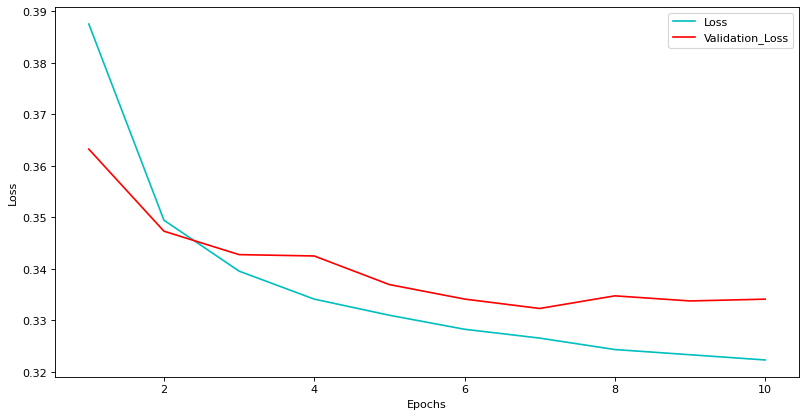

In [181]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(range(1,11),hist.history['loss'],color = 'c',label='Loss')
plt.plot(range(1,11),hist.history['val_loss'] , color = 'r',label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [184]:
np.argmin(hist.history['val_loss'])

6